sklearn Output 

Training Mean Squared Error: 21.641574096655578
Testing Mean Squared Error: 24.311426929693095
Weights:
 -0.11246348073596546x0 + 0.030081016815615393x1 + 0.040730991914943594x2 + 2.786767190419295x3 + -17.240634709601437x4 + 4.432487835771645x5 + -0.006239981732825178x6 + -1.4484850400834106x7 + 0.26211379341354785x8 + -0.010639097815924835x9 + -0.9163986791910486x10 + 0.012451646900831677x11 + -0.5093491195324029x12 




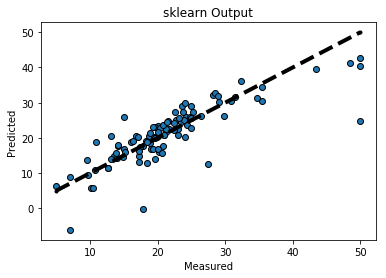

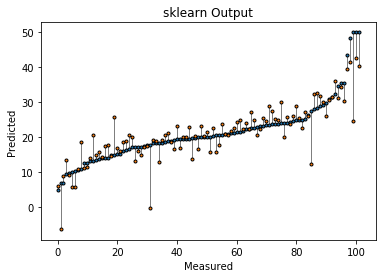

Analytical Output 

Training Mean Squared Error: 21.641574096655575
Testing Mean Squared Error: 24.311426929693486
Weights:
 30.288948339371856x0 + -0.11246348073596503x1 + 0.030081016815610373x2 + 0.04073099191496653x3 + 2.786767190419131x4 + -17.2406347096025x5 + 4.432487835771608x6 + -0.006239981732820213x7 + -1.4484850400833726x8 + 0.26211379341358054x9 + -0.010639097815926288x10 + -0.9163986791912105x11 + 0.012451646900831245x12 + -0.5093491195324129x13 




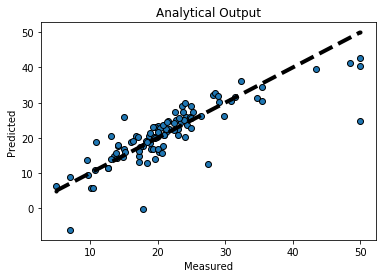

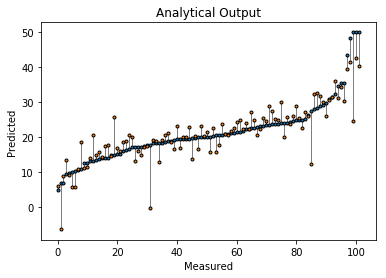

Numerical Output 

Training Mean Squared Error: 23.847591759591225
Testing Mean Squared Error: 28.573038001593694
Weights:
 0.5299196084457829x0 + -0.10275723246978682x1 + 0.04302722953474385x2 + 0.017457968446839996x3 + 0.6433925488162425x4 + 0.18805360987308153x5 + 5.315046146582033x6 + 0.00044009055990301373x7 + -0.8805778359737659x8 + 0.15053532727703278x9 + -0.008887228418428523x10 + -0.34811957259872733x11 + 0.018146395852990736x12 + -0.5162600754378232x13 




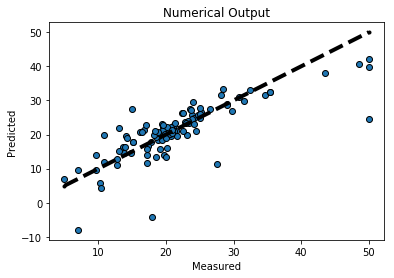

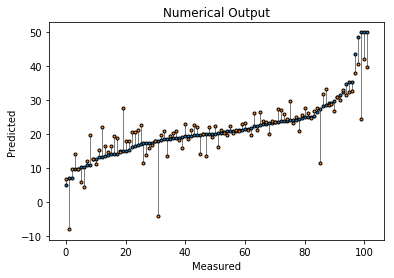

In [1]:
%matplotlib inline

# import numpy for use of matrix multiplication
import numpy as np
# import scipy for use in linear regression base testing
from scipy import linalg
# allows a deep copy
from copy import deepcopy

# import sklearn modules for use in lin regression
# import function to split data
from sklearn.model_selection import train_test_split
# import function to generate mean squared error
from sklearn.metrics import mean_squared_error
# import dataset for use in boston dataset
from sklearn import datasets, linear_model
# import matplotlib to allow visualization of data
import matplotlib.pyplot as plt
# import LineCollection to draw lines
from matplotlib.collections import LineCollection


def types_analysis():
    ''' the types of analyses that are computed '''
    return ['sklearn','Analytical','Numerical']


def clone(*args):
    ''' function to deepcopy and return a series of arguments '''
    return tuple(deepcopy(x) for x in args)


def println(*args):
    ''' print several arguments, each on a newline '''
    # start on new line
    print()
    # iterate through input arguments
    for arg in args:
        # print argument on new line
        print(arg)
    # move onto a new line
    print()


def split_boston_data():
    ''' load and split boston data '''
    # load data from boston dataset
    data, target = datasets.load_boston(True)
    # break up data into 80% training and 20% testing
    # with input data and output targets
    train_data,test_data,train_target,test_target = train_test_split(
        data,(target[:, np.newaxis]),test_size=0.2,random_state=42)
    # return training and testing data and target
    return train_data,test_data,train_target,test_target


def plot_lines(title,ax,target,predict):
    ''' plot a single subplot based on targets and predictions '''
    # create single scatterplot
    ax.scatter(target,predict,edgecolors=(0,0,0))
    # get minimum and maximum from target data
    data_min,data_max = np.amin(target),np.amax(target)
    # set regression line
    ax.plot([data_min,data_max],[data_min,data_max],'k.--',lw=4)
    # set the title for the subplot
    ax.set_title(title)
    # label the x axis
    ax.set_xlabel('Measured')
    # label the y axis
    ax.set_ylabel('Predicted')


def plot_dots(title,ax,target,predict):
    ''' plot a single subplot based on targets and predictions '''
    # get number of data points
    N = len(predict)
    # create range of values based on number data points
    x = np.arange(N)
    # get array of indeces from sorted target data
    inds = np.argsort(target.T[0])
    # sort target data
    targ_s = target.T[0][inds]
    # sort prediction data
    pred_s = predict.T[0][inds]    
    # get coordinates of lines connecting target and prediction
    points = np.array([[[i, targ_s[i]], [i, pred_s[i]]] for i in range(N)])
    # create line object based on coordinates
    lines = LineCollection(points,linewidths=1,colors='black',zorder=0)
    # halve the width of the lines
    lines.set_linewidths(0.5*np.ones(N))
    # set the target points on subplot
    ax.scatter(x,targ_s,s=9,edgecolors=(0,0,0))
    # set the prediction points on the subplot
    ax.scatter(x,pred_s,s=9,edgecolors=(0,0,0))
    # add lines between target and prediction
    ax.add_collection(lines)
    # set title of subplot
    ax.set_title(title)
    # set title of x axis
    ax.set_xlabel('Measured')
    # set title of y axis
    ax.set_ylabel('Predicted')


def print_one(title,weight,mse_train,mse_test):
    ''' prints the mean squared errors per each type of analysis '''
    # print type of analysis
    print(title,'\n')
    # print training mean squared error
    print('Training Mean Squared Error:',mse_train)
    # print testing mean squared error
    print('Testing Mean Squared Error:',mse_test)
    # create equation with coefficients and variables
    weight_str = [str(w)+'x'+str(i) for i,w in enumerate(weight[0])]
    # print the weight equation
    print('Weights:\n',' + '.join(weight_str),'\n\n')


def output_one(title,target,weight,prediction,mse_train,mse_test):
    ''' output a single entry and graph '''
    # create single subplot
    fig1, ax1 = plt.subplots(1,sharex=True)
    # create second subplot
    fig2, ax2 = plt.subplots(1,sharex=True)
    # print type of analysis, weight, mean squared errors
    print_one(title,weight,mse_train,mse_test)
    # plot the linear regression line
    plot_lines(title,ax1,target,prediction)
    # plot the offset between target and prediction
    plot_dots(title,ax2,target,prediction)
    # show the graphs
    plt.show()


def output_summary(target,*args):
    ''' print data output and construct graphs '''
    # return the type of analyses computed
    analyses = types_analysis()
    # get the number of analyses
    N = len(analyses)
    # get the number of variables measured per each analysis
    A = int(len(args)/N)
    # get subplot 1 object
    fig1, ax1 = plt.subplots(N,sharex=True)
    # get subplot 2 object
    fig2, ax2 = plt.subplots(N,sharex=True)
    # iterate through each analysis
    for i,a in enumerate(analyses):
        # get offset of the analysis
        off = i*A
        # print output data
        print_one(a,args[off],args[off+1],args[off+2])
        # plot prediction and target offsets
        plot_dots(a,ax1[i],target,args[off+3])
        # plot the regression line based on target vs prediction
        plot_lines(a,ax2[i],target,args[off+3])
    # ensure graphs don't overlap
    fig1.tight_layout()
    # ensure graphs don't overlap
    fig2.tight_layout()
    # show the plots to the user
    plt.show()


def insert_weight(data):
    ''' add a weight of 1 to the first element of each row '''
    return np.insert(data,0,[1 for x in range(data.shape[0])],axis=1)


def calculate_decomposition(t,X,w):
    ''' calculate decomposition for use in A*At equation '''
    return t - np.matmul(X,w)


def calculate_mean_squared_error(data,target,weights):
    ''' calculate mean squared error MSE = (1/N) * (t-X*w)t * (t-X*w) '''
    # calculate decomposition D = t - X*w
    decomp = calculate_decomposition(target,data,weights)
    # calculate 1/N * (t-X*w)t * (t-X*w)
    mse = (1/data.shape[0])*np.matmul(decomp.T,decomp)
    # return mean squared error from matrix
    return mse[0][0]


def calculate_gradient(data,target,weights):
    ''' calculate gradient delta l(w) = (1/N) * Xt * (t-X*w) '''
    # calculate the decomposition
    decomp = calculate_decomposition(target,data,weights)
    # return the gradient for use with w = w * delta grad
    return (1/data.shape[0])*np.matmul(data.T,decomp)


def calculate_prediction(data,weights):
    ''' calculate the predicted target based on computed weights '''
    return np.matmul(data,weights)


def linear_regression_scikit(train_data,test_data,train_target,test_target):
    ''' use sklearn to compute weights, predicted answer, and mean squared errors '''
    # initialize linear regression object
    regr = linear_model.LinearRegression()
    # fit the training data to the target
    # this trains the model
    regr.fit(train_data,train_target)
    # calculate target mean squared error using sklearn function
    mse_target = mean_squared_error(train_target,regr.predict(train_data))
    # calculate prediction based on test data
    predict = regr.predict(test_data)
    # calculate mean squared error based on test data and prediction
    mse_test = mean_squared_error(test_target,predict)
    # return the weights, predicted values, and mean squared errors    
    return regr.coef_,predict,mse_test,mse_target


def linear_regression_analytical(train_data,test_data,train_target,test_target):
    ''' compute linear regression using analytical methods '''
    # insert bias at beginning of each row of weights
    train_data_w = insert_weight(train_data)
    # insert bias at beginning of each row of weights
    test_data_w = insert_weight(test_data)
    # compute matrix inversion of training data
    inver = linalg.inv(np.matmul(train_data_w.T,train_data_w))
    # calculate coefficients based on training data
    weights = np.matmul(np.matmul(inver,train_data_w.T),train_target)
    # calculate the prediction
    predict = calculate_prediction(test_data_w,weights)
    # calculate mean squared error for training data for comparison to testing data
    mse_test = calculate_mean_squared_error(test_data_w,test_target,weights)
    # calculate mean squared error for testing data
    mse_target = calculate_mean_squared_error(train_data_w,train_target,weights)
    # return weights, predicted output, and mean squared errors
    return weights.T,predict,mse_test,mse_target


def linear_regression_numerical(train_data,test_data,train_target,test_target):
    ''' calculate mean squared error using gradient descent methods '''
    # insert coefficients into the first element of each row
    train_data_w = insert_weight(train_data)
    # insert coefficents into the first element of each row
    test_data_w = insert_weight(test_data)
    # initilaze and empty numpy array with all 0s
    weights = np.full((train_data_w.shape[1],1),0.0)
    # initialize an epsilon value for offset with gradient
    epsilon = 0.000006476
    # determine number of rounds to get coefficients
    rounds = 500000
    # iterate through number of rounds
    for _ in range(rounds):
        # calculate the gradient to move the coefficients down gradient
        gradient = calculate_gradient(train_data_w,train_target,weights)
        # append gradient offset to current weight
        weights += gradient * epsilon
    # calcualte predicted target based on test with computed weights
    predict = calculate_prediction(test_data_w,weights)
    # calculate mean squared error based on testing data
    mse_test = calculate_mean_squared_error(test_data_w,test_target,weights)
    # calculate mean squared error based on training data
    mse_train = calculate_mean_squared_error(train_data_w,train_target,weights)
    # return the weights, prediction, and mean squared errors
    return weights.T,predict,mse_test,mse_train


def driver():
    ''' driver of program '''
    # split the data based on 80% training and 20% testing for data and target
    train_data,test_data,train_target,test_target = split_boston_data()
    # get weight, prediction, and mean squared error for sklearn method
    weight_sk,predict_sk,mse_test_sk,mse_train_sk = \
        linear_regression_scikit(
            train_data,test_data,train_target,test_target)
    # print and graph data for sklearn output
    output_one('sklearn Output',test_target,weight_sk,predict_sk,mse_train_sk,mse_test_sk)

    # get weight, prediction, and mean squared error for analytical method
    weight_a,predict_a,mse_test_a,mse_train_a = \
        linear_regression_analytical(
            train_data,test_data,train_target,test_target)
    # print and graph data for Analytical analysis of linear regression
    output_one('Analytical Output',test_target,weight_a,predict_a,mse_train_a,mse_test_a)

    # get weight, prediction, and mean squared error for numerical method
    weight_n,predict_n,mse_test_n,mse_train_n = \
        linear_regression_numerical(
            train_data,test_data,train_target,test_target)
    # print and graph data for Numerical analysis of linear regression
    output_one('Numerical Output',test_target,weight_n,predict_n,mse_train_n,mse_test_n)

    
if __name__ == '__main__':
    ''' entry point of program '''
    driver()

